### This Notebook is about exploring the Gemsim Library for Natural Language Processing Projects.

- gensim is helpful for topic modeling analysi.

- Gensim has some text preprocessing abilities such as tokenization, stop word removal and stemming;

- It uses Word2vec word embedding.

- It can identify similarities between documents based on their content

In [13]:
import gensim.downloader as api
import pandas as pd

##### The google news model was used for the training process

In [2]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


## Exploring the gensim a bit...


In [3]:
wv.similarity(w1="great", w2="good")

0.729151

In [4]:
wv.similarity(w1="great", w2="well")

0.4098271

In [5]:
wv.similarity(w1="profit", w2="loss")

0.34199455

In [6]:
wv.most_similar("good")

[('great', 0.7291510105133057),
 ('bad', 0.7190051078796387),
 ('terrific', 0.6889115571975708),
 ('decent', 0.6837348341941833),
 ('nice', 0.6836092472076416),
 ('excellent', 0.644292950630188),
 ('fantastic', 0.6407778263092041),
 ('better', 0.6120728850364685),
 ('solid', 0.5806034803390503),
 ('lousy', 0.576420247554779)]

In [7]:
wv.most_similar("dog")

[('dogs', 0.8680489659309387),
 ('puppy', 0.8106428384780884),
 ('pit_bull', 0.780396044254303),
 ('pooch', 0.7627376914024353),
 ('cat', 0.7609457969665527),
 ('golden_retriever', 0.7500901818275452),
 ('German_shepherd', 0.7465174198150635),
 ('Rottweiler', 0.7437615394592285),
 ('beagle', 0.7418621778488159),
 ('pup', 0.740691065788269)]

### Performing some Mathematics using gensim..

In [9]:
#king - man + woman = Queen

#France - Paris + Berlin = Germany


In [10]:
wv.most_similar(positive=['france', 'Berlin'], negative=['Paris'])

[('germany', 0.6243547797203064),
 ('german', 0.5284983515739441),
 ('europe', 0.5134673118591309),
 ('Germany', 0.4948982894420624),
 ('england', 0.4913320243358612),
 ('european', 0.484893798828125),
 ('Köln', 0.4778088629245758),
 ('usa', 0.469026654958725),
 ('sweden', 0.4658765196800232),
 ('Bielefeld', 0.4640102982521057)]

In [11]:
wv.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

#### Which word does not fall in the same category as the rest

In [12]:
wv.doesnt_match(['facebook', 'cat', 'google', 'microsoft'])

'cat'

### News Classification

In [17]:
df = pd.read_csv('/content/Fake_Real_Data.csv')
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


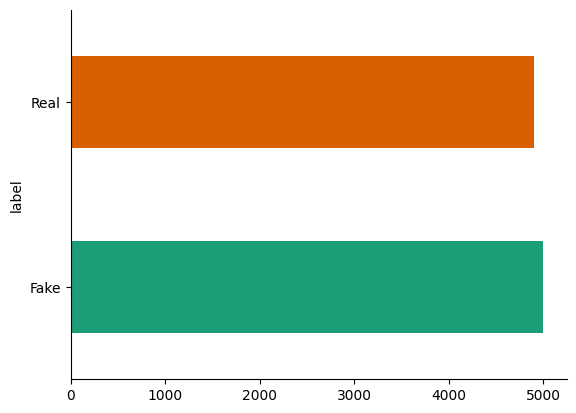

In [18]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
df['label_num'] = df.label.map({
    "Fake": 0,
    "Real": 1
})

df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [20]:
!pip install spacy
!python -m spacy download en_core_web_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Let's preprocess the data by removing stop words, Punctuations and lemmatise the words

##### To get the vector of a sentence, gensim will take the vectors of each word and average them out to get a sentence vector with the same dimensions as a single word vector.

In [21]:
import spacy

# Load the installed model
nlp = spacy.load("en_core_web_lg")

In [26]:
def preprocess_and_vetorize(text):
  doc = nlp(text)

  filtered_tokens = []
  for token in doc:
    if token.is_punct or token.is_stop:
      continue
    filtered_tokens.append(token.lemma_)
  return wv.get_mean_vector(filtered_tokens)

In [27]:
preprocess_and_vetorize("Don't worry if you don't understand")

array([ 0.00235079, -0.00284596, -0.03638233,  0.00413919, -0.10635224,
        0.05758579,  0.13348952, -0.00689176,  0.05995331, -0.02875906,
       -0.02279907, -0.06939262, -0.01549996,  0.03538099, -0.0873947 ,
        0.10044542,  0.02490648,  0.11501945,  0.00442711, -0.07228819,
       -0.04447255,  0.02785169,  0.03338735,  0.02222995,  0.07053161,
        0.06723307,  0.03483712, -0.0873695 ,  0.04152397, -0.0969665 ,
       -0.00914938,  0.00555944, -0.0277799 , -0.00701522,  0.05281431,
       -0.01066206,  0.02466576,  0.02378148,  0.0279402 ,  0.05527755,
        0.01359304, -0.01062085,  0.06734448, -0.03492254, -0.08421434,
       -0.04324378, -0.03578918, -0.00817786, -0.02093195,  0.01856531,
       -0.07064191,  0.05023994, -0.03036207, -0.0412168 , -0.00684169,
        0.05189689, -0.04097777, -0.05789134,  0.044417  , -0.0470418 ,
       -0.01475445,  0.01373999, -0.00459672,  0.00419459,  0.04307397,
       -0.01500929, -0.08037488,  0.05358911, -0.0211829 , -0.00

In [28]:
df['vector'] = df['Text'].apply(lambda text: preprocess_and_vetorize(text))

In [29]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[0.008657642, 0.019024342, -0.011917442, 0.032..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[0.010864096, 0.007960429, 0.0011915653, 0.014..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[0.018134918, 0.0062743523, -0.005872244, 0.03..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[0.01255197, 0.012613623, 5.9780963e-05, 0.021..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.0019059887, 0.011889367, 0.0035395357, 0.0..."


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [31]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1024
           1       0.93      0.95      0.94       956

    accuracy                           0.94      1980
   macro avg       0.94      0.94      0.94      1980
weighted avg       0.94      0.94      0.94      1980



In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf_2 = GradientBoostingClassifier()

clf_2.fit(X_train_2d, y_train)

y_pred = clf_2.predict(X_test_2d)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1024
           1       0.98      0.99      0.98       956

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



### Make a Prediction

- The predicted value is 0, which corresponds to the article being fake. This is correct.

In [37]:
test_news = [
    "   Trump Surrogate BRUTALLY Stabs : ' pathetic ' ( video ) s look republican presidential candidate Donald Trump lose support rank . know thing get bad surrogate start turn , exactly happen Fox News Newt Gingrich call Trump    pathetic . Gingrich know Trump need focus Hillary Clinton remotely want chance defeat . , Trump hurt feeling Republicans don t support sexual assault woman turn , include House Speaker Paul Ryan ( R - WI ) . , Trump lash party . Gingrich say Fox News : look , , let Trump , admire ve try help . s big Trump little Trump . little Trump frankly pathetic . mean , s mad get phone ? Trump s refer fact Paul Ryan didn t congratulate debate . probably didn t win despite Trump s ego tell . Gingrich add : Donald Trump opponent . Hillary Clinton . Paul Ryan . s anybody . Trump doesn t realize person mad truly bad enemy . ultimately lead defeat blame . watch Politico : Featured photo Joe Raedle / Getty Images"
]

test_news_vectors = [preprocess_and_vetorize(n) for n in test_news]
clf_2.predict(test_news_vectors)

array([0])

### Confusion Matrix

Text(95.72222222222221, 0.5, 'Truth')

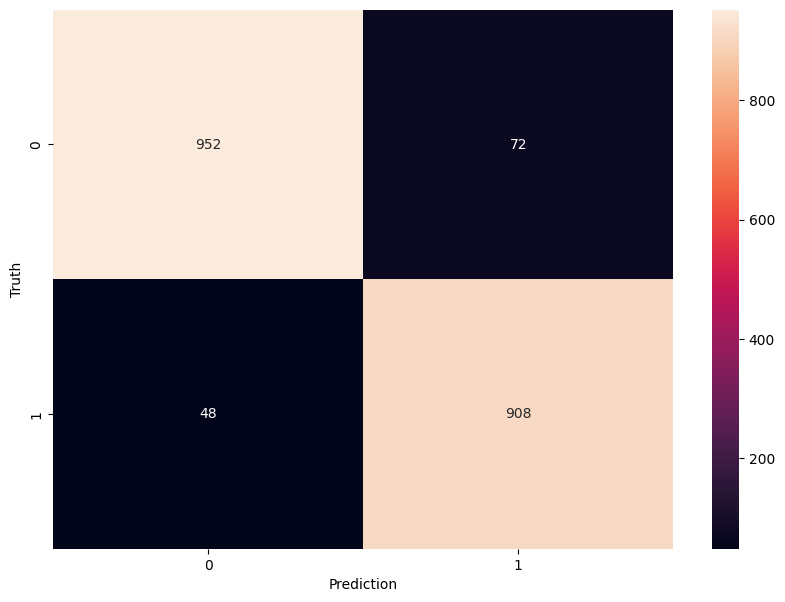

In [38]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')